# Creating Plots on Data Aware Grids

## Using FacetGrid, catplot and lmplot

### Building a FacetGrid

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('../data/college_datav3.csv')

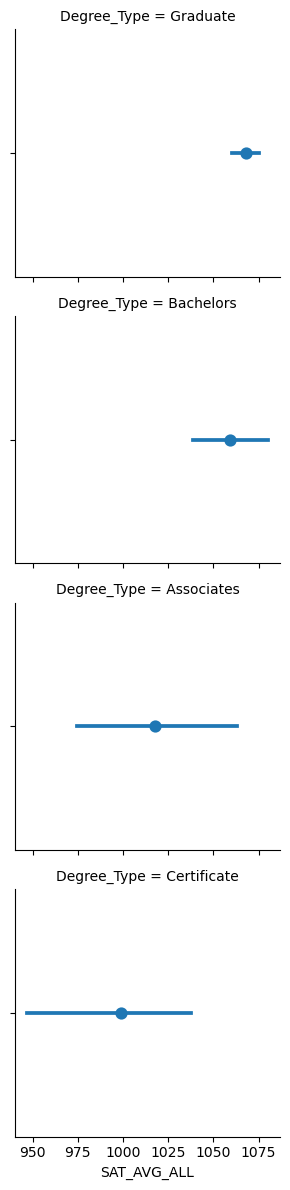

<Figure size 640x480 with 0 Axes>

In [10]:
# Create FacetGrid with Degree_Type and specify the order of the rows using row_order
g2 = sns.FacetGrid(df, 
             row="Degree_Type",
             row_order=['Graduate', 'Bachelors', 'Associates', 'Certificate'])

# Map a pointplot of SAT_AVG_ALL onto the grid
g2.map(sns.pointplot, 'SAT_AVG_ALL')

# Show the plot
plt.show()
plt.clf()

### Using a catplot

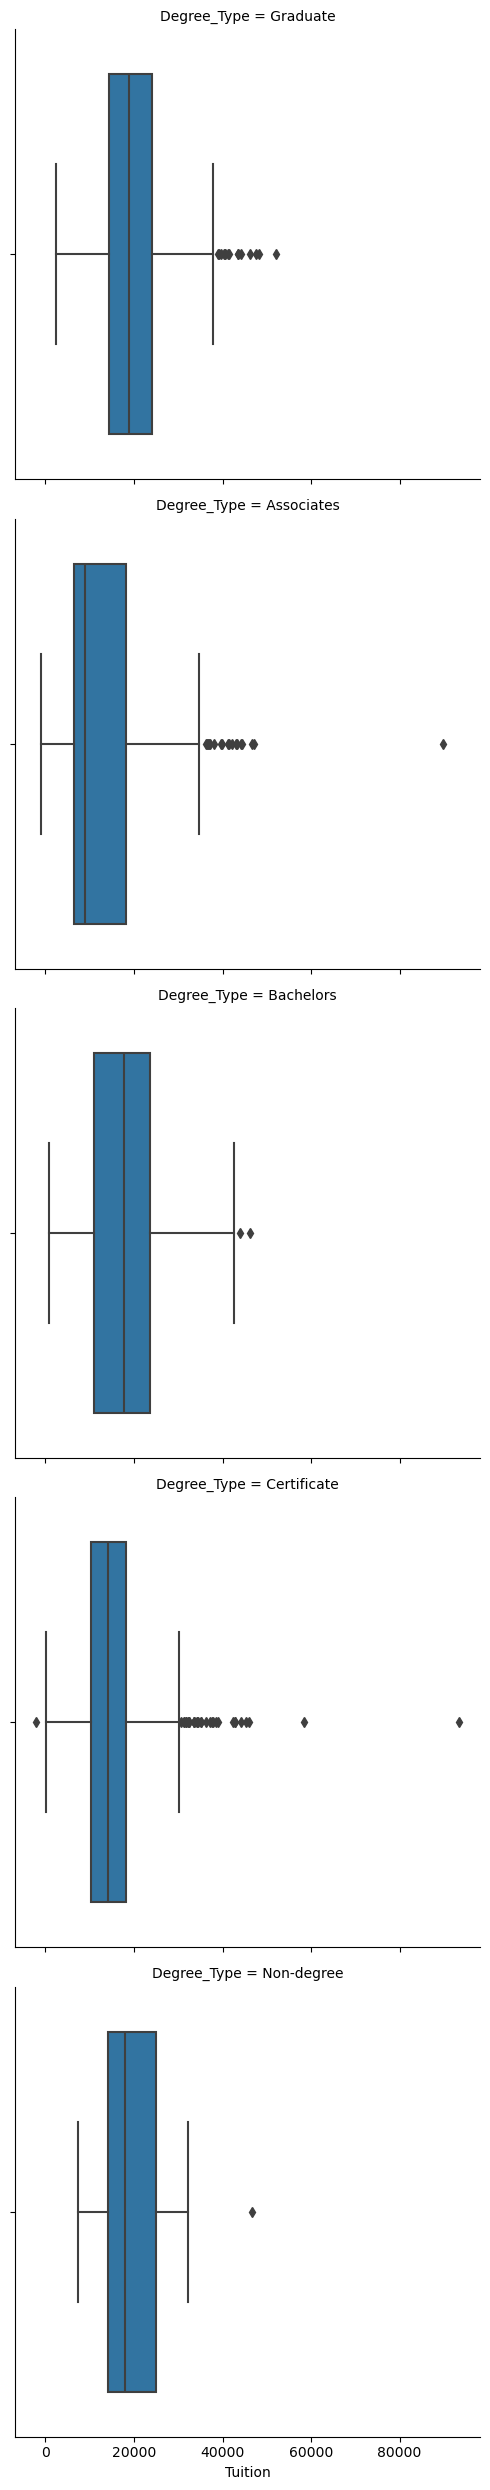

<Figure size 640x480 with 0 Axes>

In [11]:
# Create a factor plot that contains boxplots of Tuition values
sns.catplot(data=df,
         x='Tuition',
         kind='box',
         row='Degree_Type')

plt.show()
plt.clf()

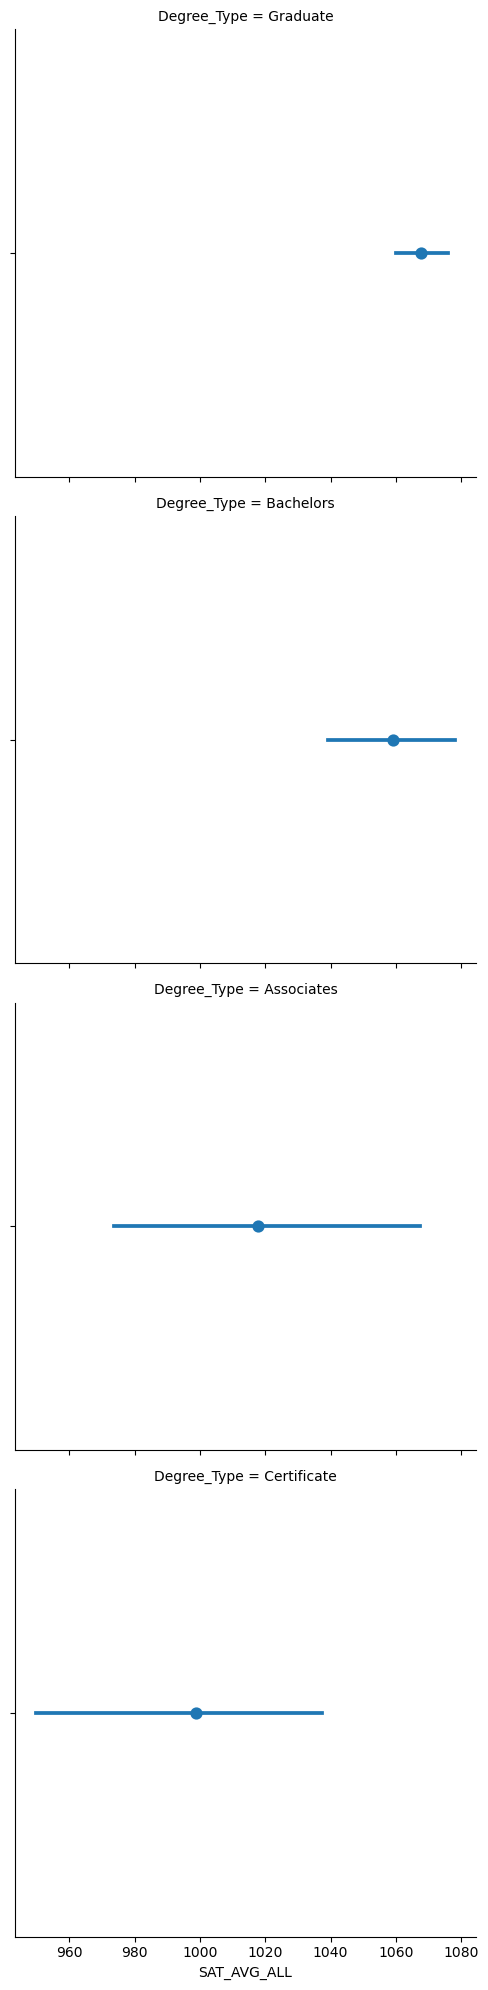

<Figure size 640x480 with 0 Axes>

In [12]:
# Create a facetted pointplot of Average SAT_AVG_ALL scores facetted by Degree Type 
sns.catplot(data=df,
        x='SAT_AVG_ALL',
        kind='point',
        row='Degree_Type',
        row_order=['Graduate', 'Bachelors', 'Associates', 'Certificate'])

plt.show()
plt.clf()

### Using a lmplot

In [13]:
degree_ord = ['Graduate', 'Bachelors', 'Associates']

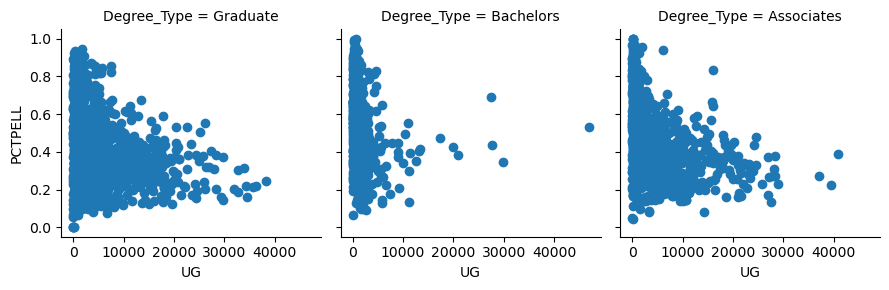

<Figure size 640x480 with 0 Axes>

In [14]:
# Create a FacetGrid varying by column and columns ordered with the degree_order variable
g = sns.FacetGrid(df, col="Degree_Type", col_order=degree_ord)

# Map a scatter plot of Undergrad Population compared to PCTPELL
g.map(plt.scatter, 'UG', 'PCTPELL')

plt.show()
plt.clf()

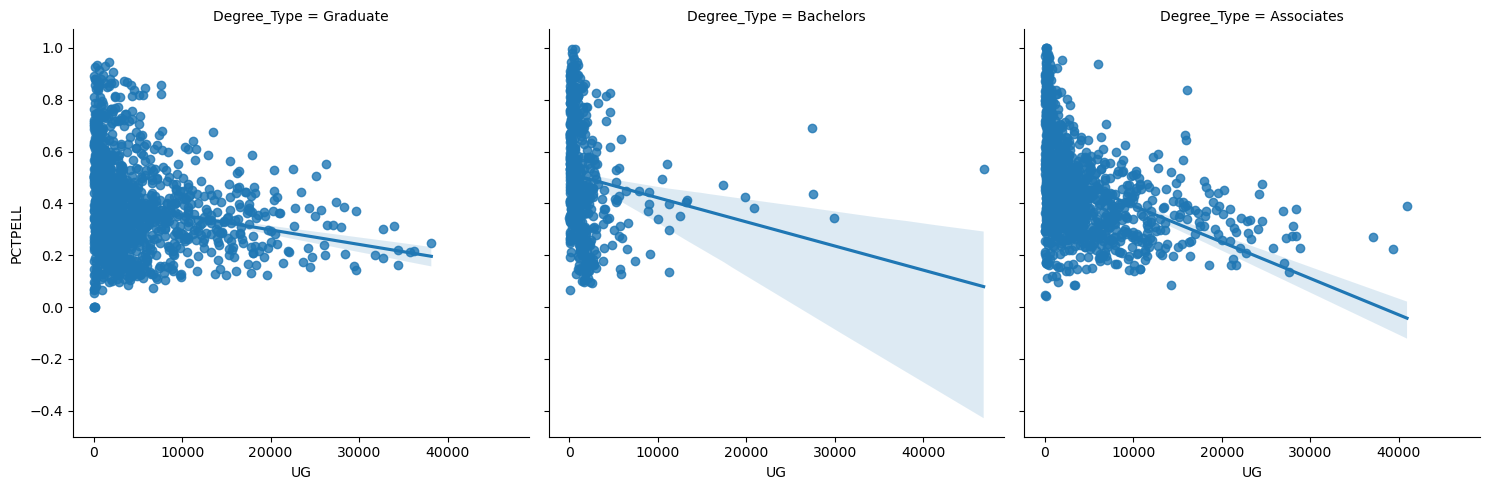

<Figure size 640x480 with 0 Axes>

In [16]:
# Re-create the previous plot as an lmplot
sns.lmplot(data=df,
        x='UG',
        y='PCTPELL',
        col="Degree_Type",
        col_order=degree_ord)

plt.show()
plt.clf()

In [17]:
inst_ord = ['Public', 'Private non-profit']

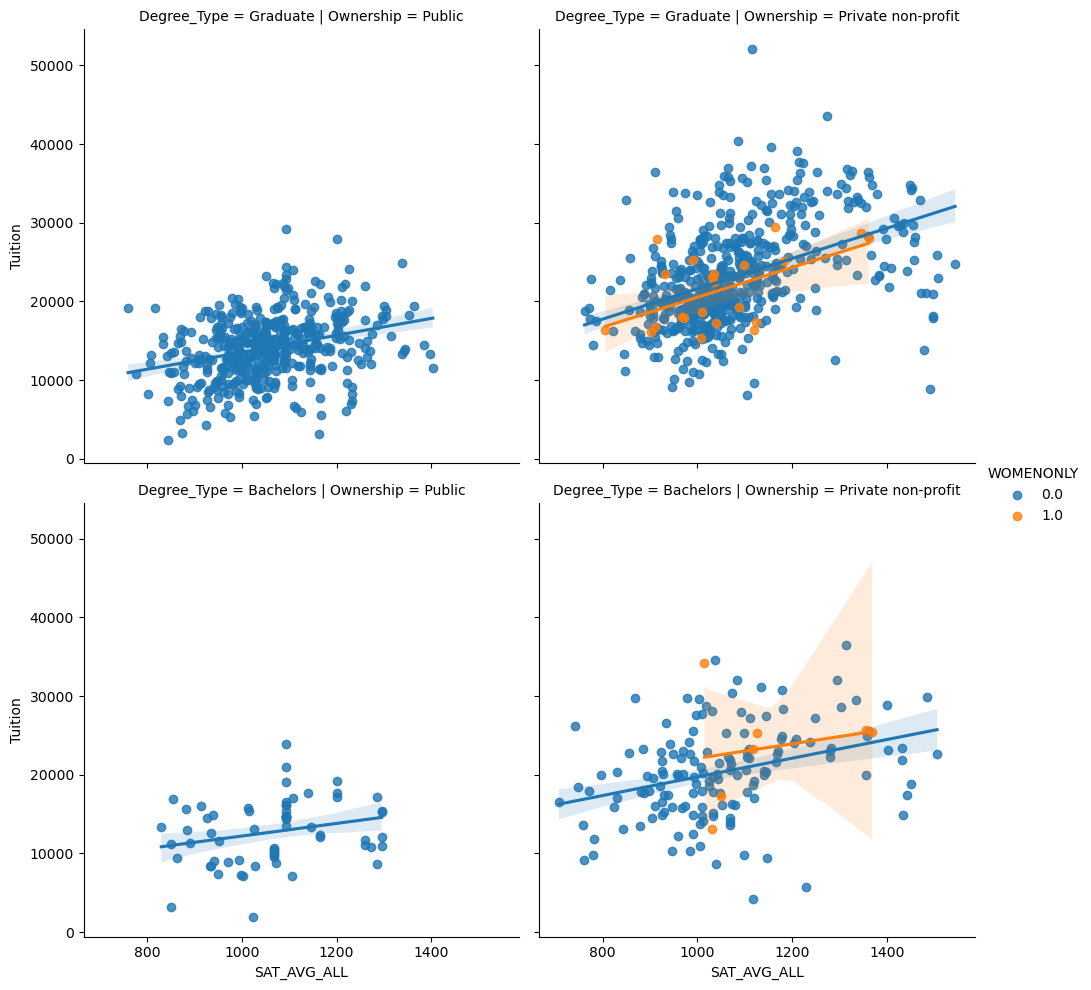

<Figure size 640x480 with 0 Axes>

In [18]:
# Create an lmplot that has a column for Ownership, a row for Degree_Type and hue based on the WOMENONLY column
sns.lmplot(data=df,
        x='SAT_AVG_ALL',
        y='Tuition',
        col="Ownership",
        row='Degree_Type',
        row_order=['Graduate', 'Bachelors'],
        hue='WOMENONLY',
        col_order=inst_ord)

plt.show()
plt.clf()

## Using PairGrid and pairplot

### Building a PairGrid

In [20]:
df = pd.read_csv('../data/insurance_premiums.csv')

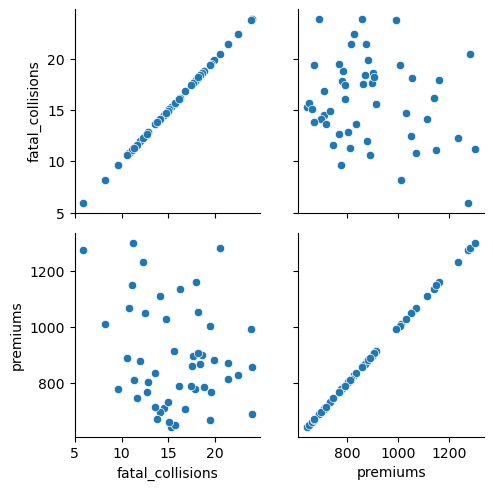

<Figure size 640x480 with 0 Axes>

In [21]:
# Create a PairGrid with a scatter plot for fatal_collisions and premiums
g = sns.PairGrid(df, vars=["fatal_collisions", "premiums"])
g2 = g.map(sns.scatterplot)

plt.show()
plt.clf()

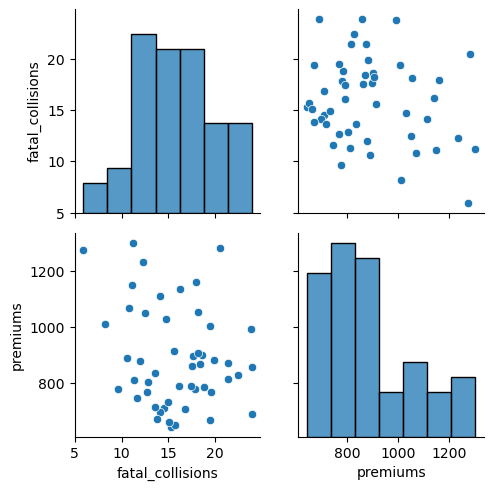

<Figure size 640x480 with 0 Axes>

In [22]:
# Create the same PairGrid but map a histogram on the diag
g = sns.PairGrid(df, vars=["fatal_collisions", "premiums"])
g2 = g.map_diag(sns.histplot)
g3 = g2.map_offdiag(sns.scatterplot)

plt.show()
plt.clf()

### Using a pairplot

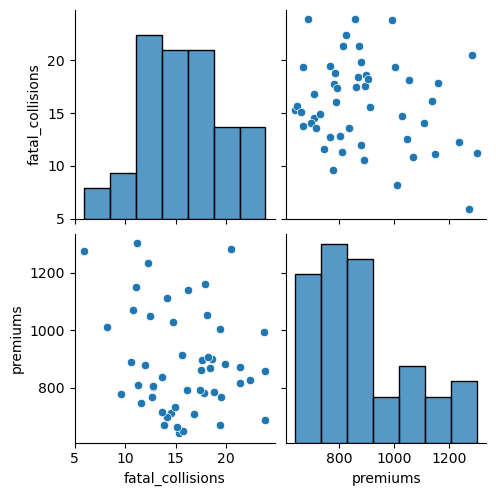

<Figure size 640x480 with 0 Axes>

In [24]:
# Create a pairwise plot of the variables using a scatter plot
sns.pairplot(data=df,
        vars=["fatal_collisions", "premiums"],
        kind='scatter')

plt.show()
plt.clf()

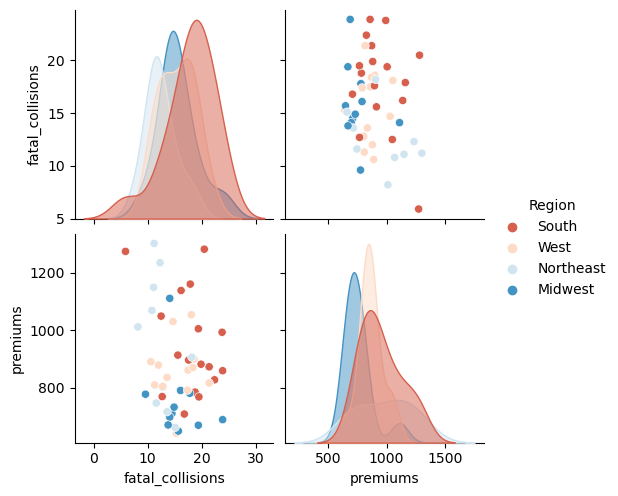

<Figure size 640x480 with 0 Axes>

In [25]:
# Plot the same data but use a different color palette and color code by Region
sns.pairplot(data=df,
        vars=["fatal_collisions", "premiums"],
        kind='scatter',
        hue='Region',
        palette='RdBu',
        diag_kws={'alpha':.5})

plt.show()
plt.clf()

### Additional pairplots

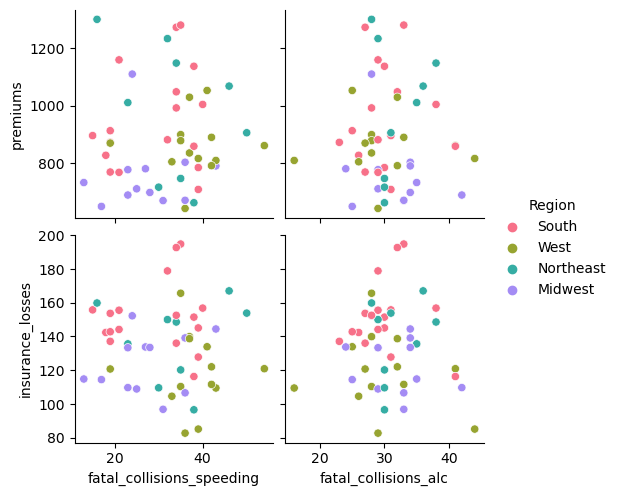

<Figure size 640x480 with 0 Axes>

In [26]:
# Build a pairplot with different x and y variables
sns.pairplot(data=df,
        x_vars=["fatal_collisions_speeding", "fatal_collisions_alc"],
        y_vars=['premiums', 'insurance_losses'],
        kind='scatter',
        hue='Region',
        palette='husl')

plt.show()
plt.clf()

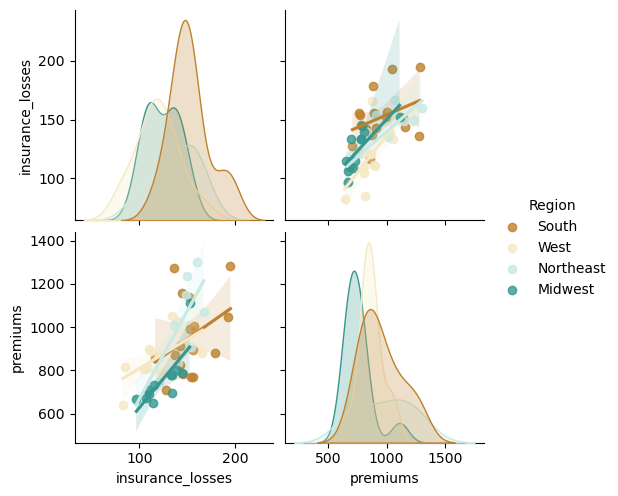

<Figure size 640x480 with 0 Axes>

In [28]:
# plot relationships between insurance_losses and premiums
sns.pairplot(data=df,
             vars=["insurance_losses", "premiums"],
             kind='reg',
             palette='BrBG',
             diag_kind= 'kde',
             hue='Region')

plt.show()
plt.clf()

## Using JointGrid and jointplot

### Building a JointGrid and jointplot

In [31]:
df = pd.read_csv('../data/bike_share.csv')
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total_rentals
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


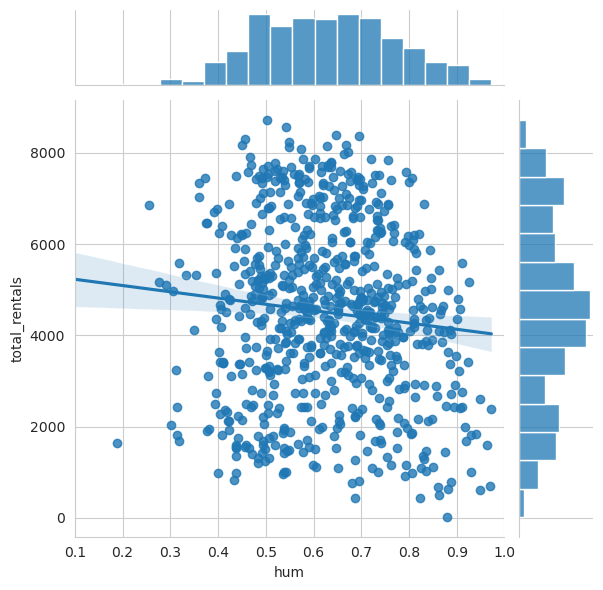

<Figure size 640x480 with 0 Axes>

In [34]:
# Build a JointGrid comparing humidity and total_rentals
sns.set_style("whitegrid")
g = sns.JointGrid(x="hum",
            y="total_rentals",
            data=df,
            xlim=(0.1, 1.0)) 

g.plot(sns.regplot, sns.histplot)

plt.show()
plt.clf()

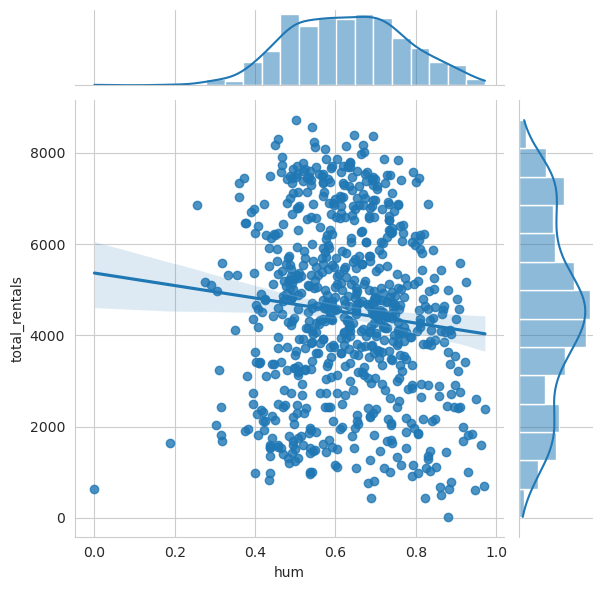

<Figure size 640x480 with 0 Axes>

In [36]:
# Create a jointplot similar to the JointGrid 
sns.jointplot(x="hum",
        y="total_rentals",
        kind='reg',
        data=df)

plt.show()
plt.clf()

### Jointplots and regression

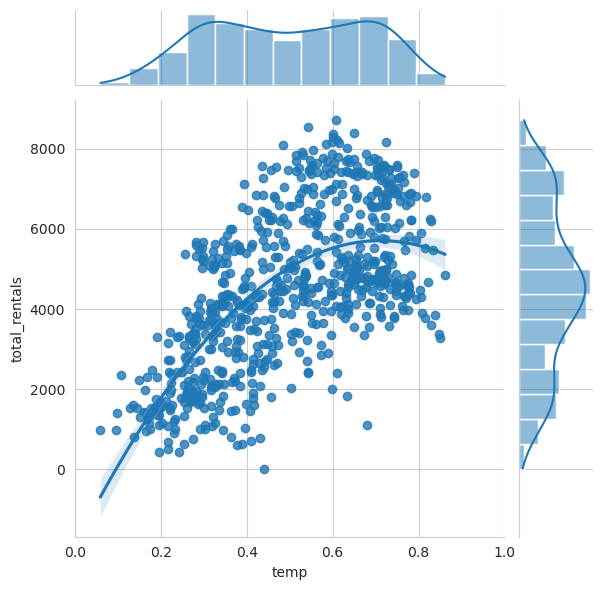

<Figure size 640x480 with 0 Axes>

In [38]:
# Plot temp vs. total_rentals as a regression plot
sns.jointplot(x="temp",
         y="total_rentals",
         kind='reg',
         data=df,
         order=2,
         xlim=(0, 1))

plt.show()
plt.clf()

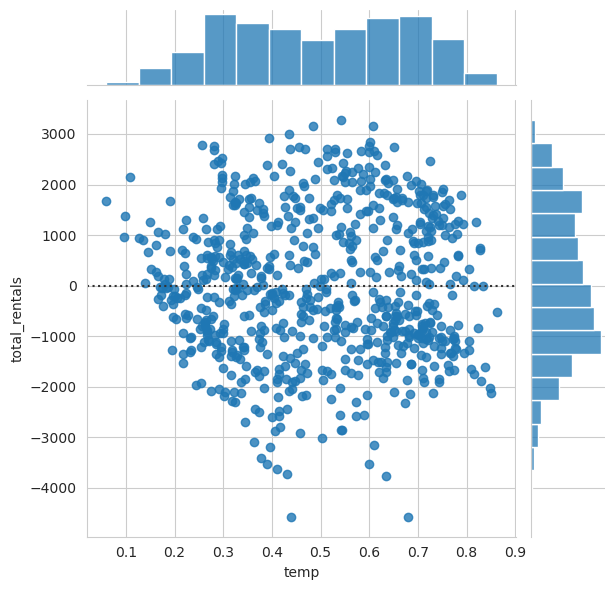

<Figure size 640x480 with 0 Axes>

In [41]:
# Plot a jointplot showing the residuals
sns.jointplot(x="temp",
        y="total_rentals",
        kind='resid',
        data=df,
        order=2)

plt.show()
plt.clf()

### Complex jointplots

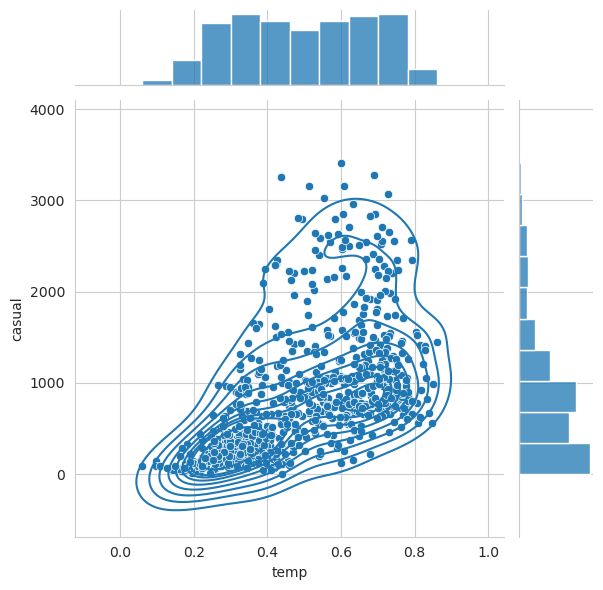

<Figure size 640x480 with 0 Axes>

In [43]:
# Create a jointplot of temp vs. casual riders
# Include a kdeplot over the scatter plot
g = sns.jointplot(x="temp",
             y="casual",
             kind='scatter',
             data=df,
             marginal_kws=dict(bins=10))
g.plot_joint(sns.kdeplot)
    
plt.show()
plt.clf()

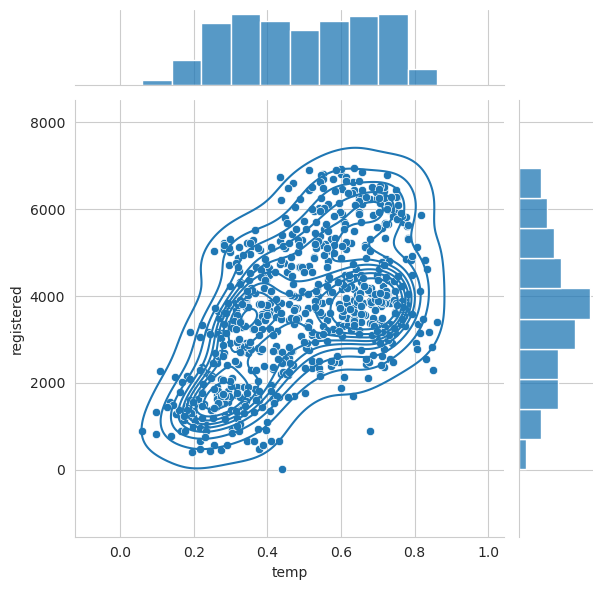

<Figure size 640x480 with 0 Axes>

In [44]:
# Replicate the above plot but only for registered riders
g = sns.jointplot(x="temp",
             y="registered",
             kind='scatter',
             data=df,
             marginal_kws=dict(bins=10))
g.plot_joint(sns.kdeplot)

plt.show()
plt.clf()